## Import Library

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [72]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [73]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", 
                        "Harga Penawaran (dari Owner)" : "Harga Penawaran",
                        "Tingkat/Lantai " : "Tingkat/Lantai",
                        "Lebar Jalan Depan Rumah (ROW)" : "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [74]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [75]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


## Data Transformation

In [76]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [77]:
# drop Terjual/Belum karena semuanya belum terjual
df = df.drop('Terjual/Belum', axis=1)

In [78]:
# Encoding Catdgorical
category_map = {'Below Standard':0, 'Standard':1, 'Premium':2,'Sangat Premium':3}
arah_map = {'Utara':0, 'Selatan':1, 'Barat':2, 'Timur':3}
posisi_map = {'Standard':0, 'Cul De Sac/Ujung Gang Buntu':1, 'Tikungan/Hook':2,
              'Kantong Belakang/Ngantong':3, 'Tusuk Sate':4}
lebar_map = {'< 1 Mobil':0, '1-2 Mobil':1, '> 2 Mobil':2}

df['Area Category'] = df['Area Category'].map(category_map)
df['Arah Hadap Rumah'] = df['Arah Hadap Rumah'].map(arah_map)
df['Posisi Rumah'] = df['Posisi Rumah'].map(posisi_map)
df['Lebar Jalan Depan Rumah'] = df['Lebar Jalan Depan Rumah'].map(lebar_map)

df["Nama Daerah"] = (
    df["Nama Daerah"]
    .astype(str) # pastikan semua string
    .str.strip() # hapus semua space lebih
    .str.title() # kapitalisasi
)
df = df[df["Nama Daerah"].str.len() > 2] # ada yang cuman SU
df = df.sort_values("Nama Daerah").reset_index(drop=True)
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,1,Anjasmoro,573,400,5,5,1,20055000000,0,3,1
1,3,Araya,330,750,8,8,4,6350000000,0,0,1
2,1,Araya,254,265,4,3,2,5300000000,1,0,1
3,1,Asemrowo,225,140,4,4,1,2500000000,1,0,2
4,1,Babatan,128,170,4,4,2,2800000000,0,0,2


In [79]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi',
                                'Tingkat/Lantai', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi',
                                'Tingkat/Lantai', 'Harga Penawaran'])
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,1.713842,0.624737,0.439931,1.020981,-1.654798,1.808961
1,0.509578,2.266812,2.265050,2.864751,4.252447,0.159819
2,0.132935,-0.008634,-0.168442,-0.208200,0.314283,0.033471
3,-0.010783,-0.595090,-0.168442,0.406390,-1.654798,-0.303457
4,-0.491498,-0.454340,-0.168442,0.406390,0.314283,-0.267358


In [80]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02
mean,-3.471707e-17,-2.314471e-17,1.851577e-16,-1.272959e-16,1.822646e-16,4.628943e-17
std,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00,1.001633e+00
min,-1.056461e+00,-1.186237e+00,-1.993561e+00,-1.437381e+00,-1.654798e+00,-5.850326e-01
25%,-6.500841e-01,-6.889226e-01,-7.768151e-01,-8.227903e-01,3.142834e-01,-4.358216e-01
50%,-3.180442e-01,-3.135912e-01,-1.684420e-01,-2.082000e-01,3.142834e-01,-2.793907e-01
75%,2.915217e-01,3.080514e-01,4.399310e-01,4.063903e-01,3.142834e-01,-1.533006e-02
max,6.610192e+00,4.378051e+00,5.306915e+00,5.937703e+00,4.252447e+00,1.130853e+01


## Visualisasi

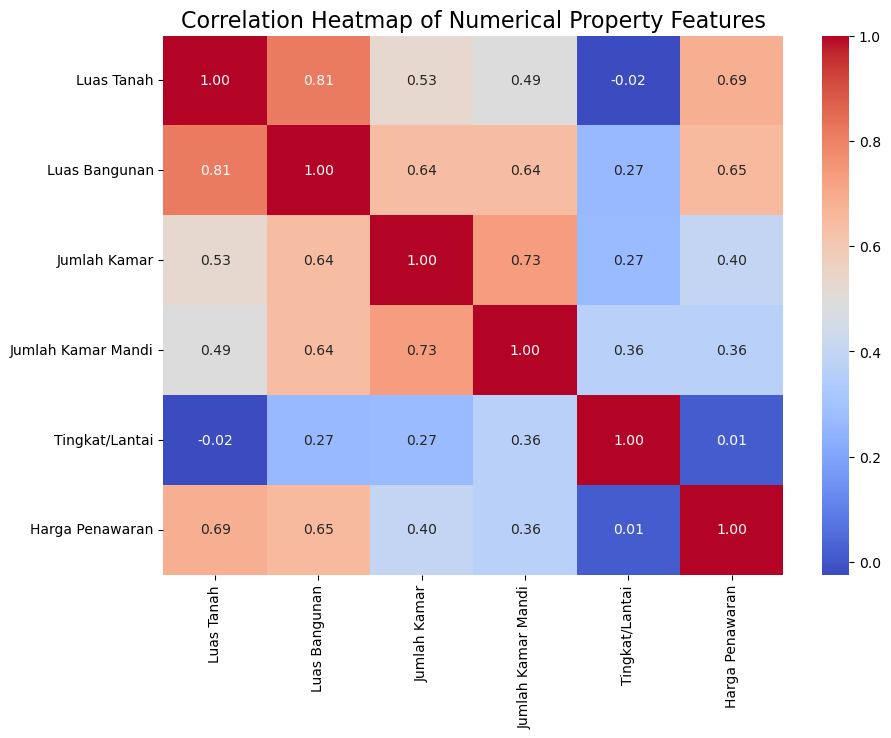

In [81]:
numerical_features = [
    'Luas Tanah', 
    'Luas Bangunan', 
    'Jumlah Kamar', 
    'Jumlah Kamar Mandi', 
    'Tingkat/Lantai', 
    'Harga Penawaran'
]

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix, 
    annot=True,     
    cmap='coolwarm',  
    fmt=".2f" 
)
plt.title('Correlation Heatmap of Numerical Property Features', fontsize=16)
plt.show()

Heatmap ini menunjukkan bahwa selain Harga Penawaran sangat dipengaruhi oleh ukuran fisik (Luas Tanah di 0.69 dan Luas Bangunan di 0.65), terdapat juga multikolinearitas yang kuat antar fitur. Luas Bangunan dan Luas Tanah memiliki korelasi sangat tinggi (0.81), yang logis. Selain itu, Jumlah Kamar dan Jumlah Kamar Mandi tidak hanya berkorelasi erat satu sama lain (0.73), tetapi keduanya juga memiliki korelasi kuat yang identik (0.64) dengan Luas Bangunan. Hal ini mengindikasikan bahwa properti yang lebih besar secara alami cenderung memiliki lebih banyak kamar dan kamar mandi, sehingga fitur-fitur ini mungkin saling tumpang tindih dalam menjelaskan variasi harga. Di sisi lain, Tingkat/Lantai adalah fitur yang paling tidak relevan, dengan korelasi hampir nol (0.01) terhadap harga, menunjukkan bahwa jumlah lantai bukanlah faktor penentu nilai properti dalam dataset ini.

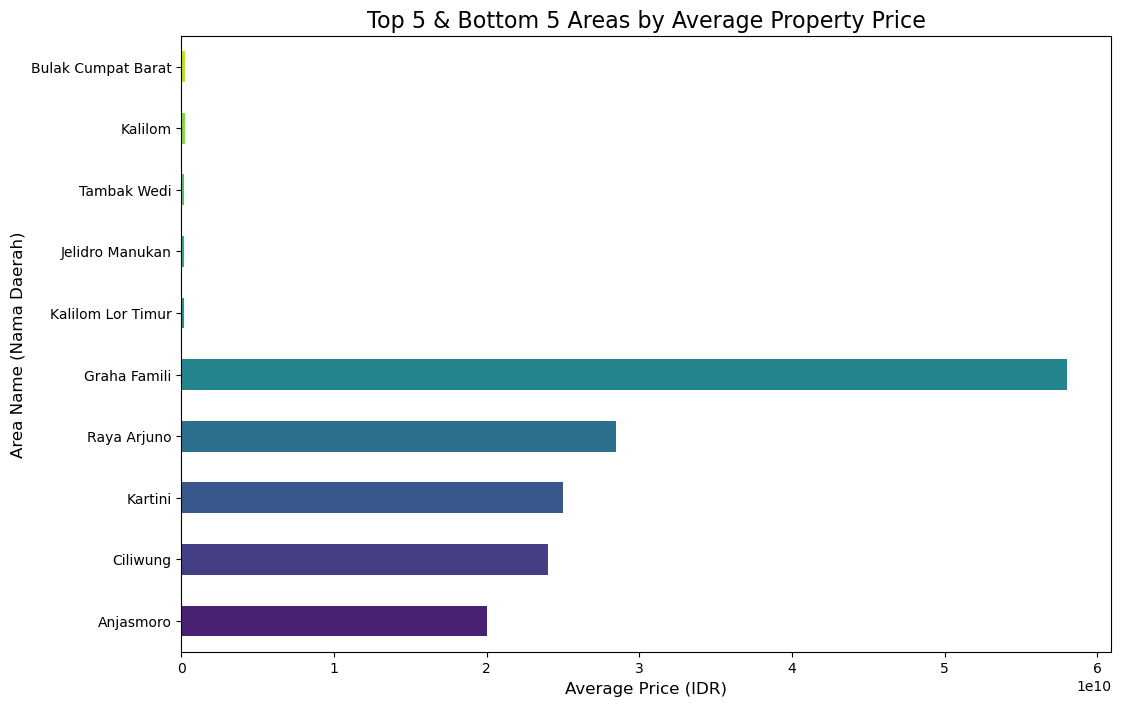

In [82]:
# Calculate the average price for each 'Nama Daerah'
avg_price_by_area = df.groupby('Nama Daerah')['Harga Penawaran'].mean().sort_values()

# Get the Top 5 (most expensive) and Bottom 5 (least expensive)
top_5_areas = avg_price_by_area.tail(5)
bottom_5_areas = avg_price_by_area.head(5)

# Combine them into one DataFrame for plotting
top_bottom_areas = pd.concat([top_5_areas, bottom_5_areas])

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
top_bottom_areas.plot(
    kind='barh', 
    color=sns.color_palette('viridis', n_colors=10) # Use a nice color palette
)

plt.title('Top 5 & Bottom 5 Areas by Average Property Price', fontsize=16)
plt.xlabel('Average Price (IDR)', fontsize=12)
plt.ylabel('Area Name (Nama Daerah)', fontsize=12)
plt.show()

Visualisasi ini dengan jelas menunjukkan adanya segmentasi pasar yang ekstrem berdasarkan lokasi. Area "Graha Famili" menonjol sebagai outlier "sangat premium" dengan harga rata-rata sekitar 58 Miliar IDR, hampir dua kali lipat dari area premium berikutnya seperti "Raya Arjuno" (sekitar 30 Miliar IDR). Terdapat kesenjangan harga yang sangat besar antara 5 area teratas (segmen premium) dan 5 area terbawah (segmen below standard), di mana harga rata-rata 5 area terbawah sangat rendah sehingga batang grafiknya hampir tidak terlihat. Ini menegaskan bahwa Nama Daerah adalah fitur pembeda yang paling kritis dalam dataset ini.

## Silhouette Score

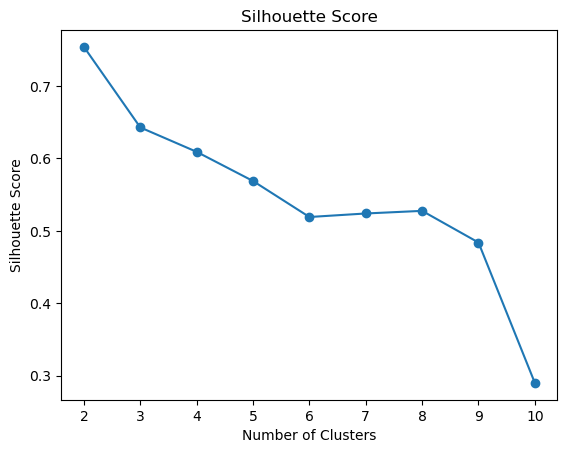

In [83]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


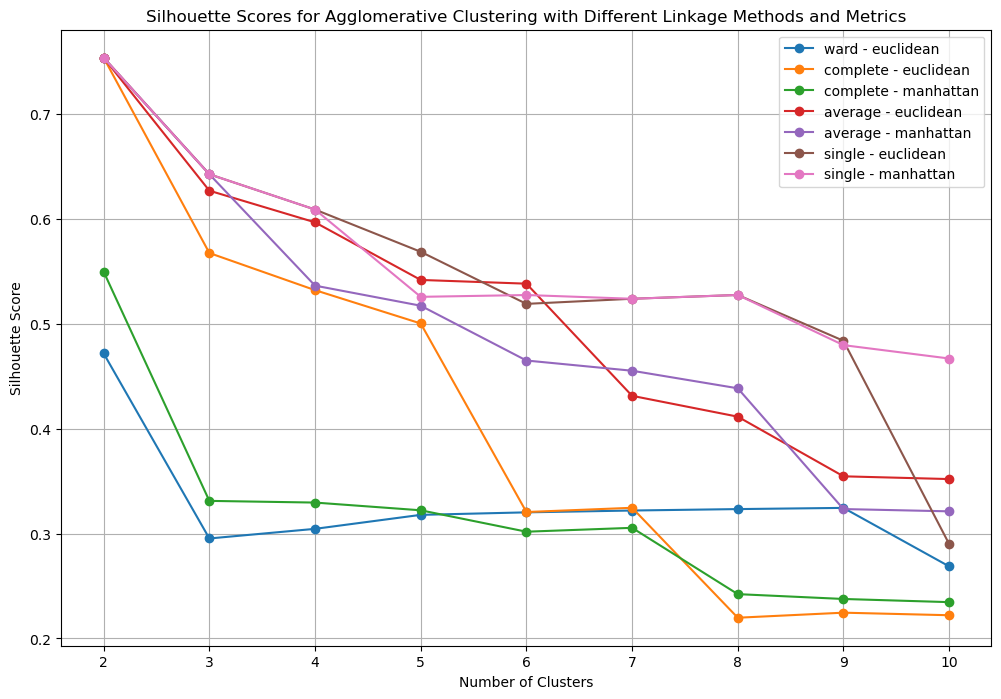

Best Silhouette Score: 0.7538662980543411
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [84]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

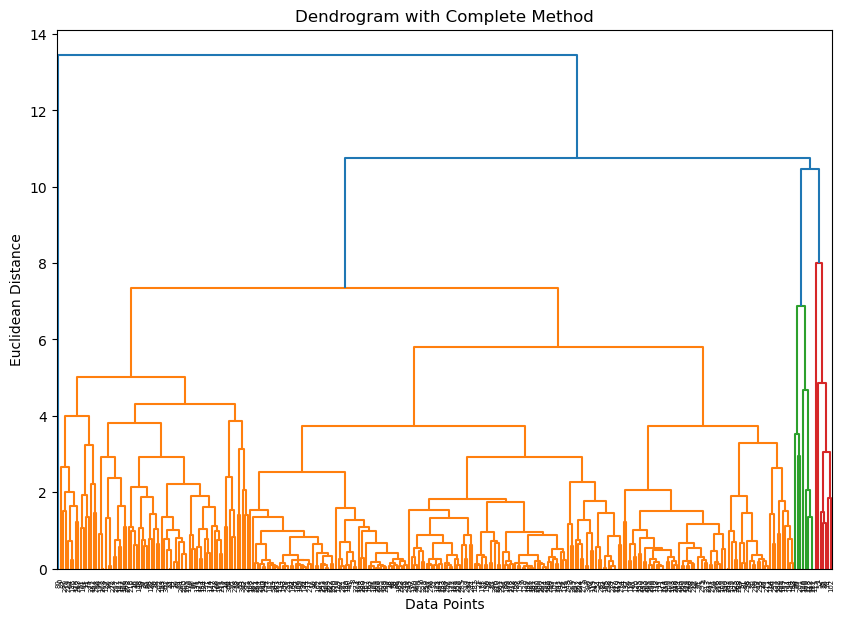

In [85]:
# Max Distance (BEST FROM C)
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

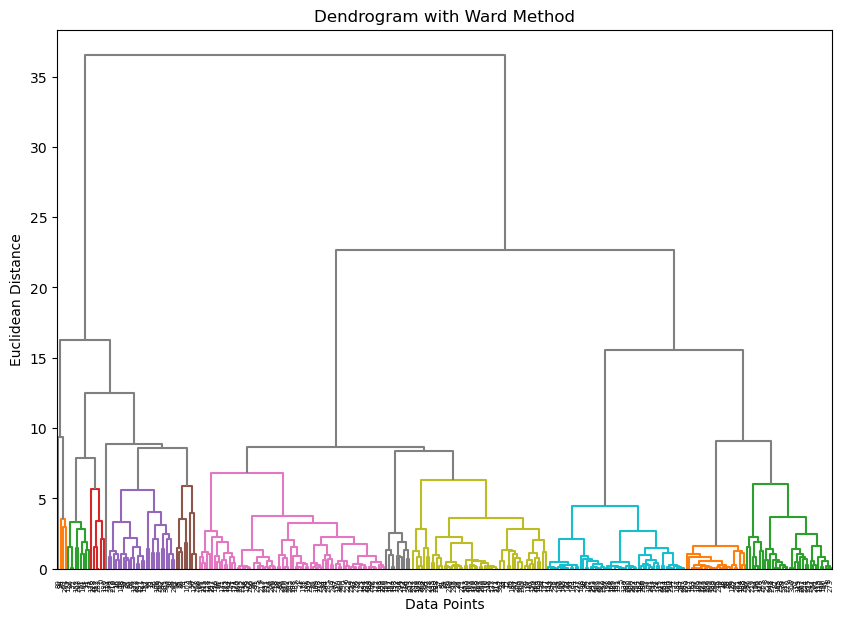

In [86]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [87]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [88]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7538662980543411


## Dendogram Visualization for Hierarchical Clustering Model

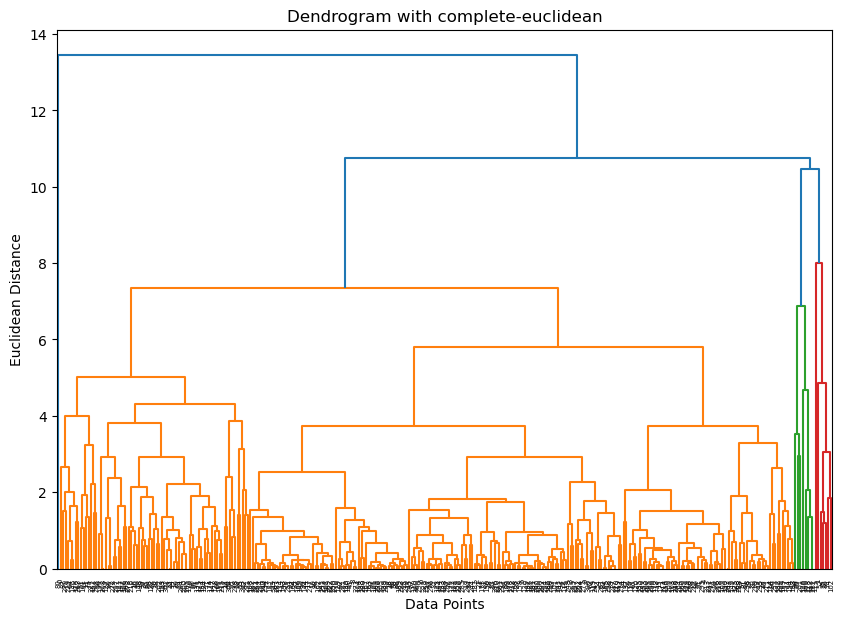

In [89]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## For Ward Method

In [90]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
y_hc = agglo.fit_predict(df_scaled)

# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.47177926756374905


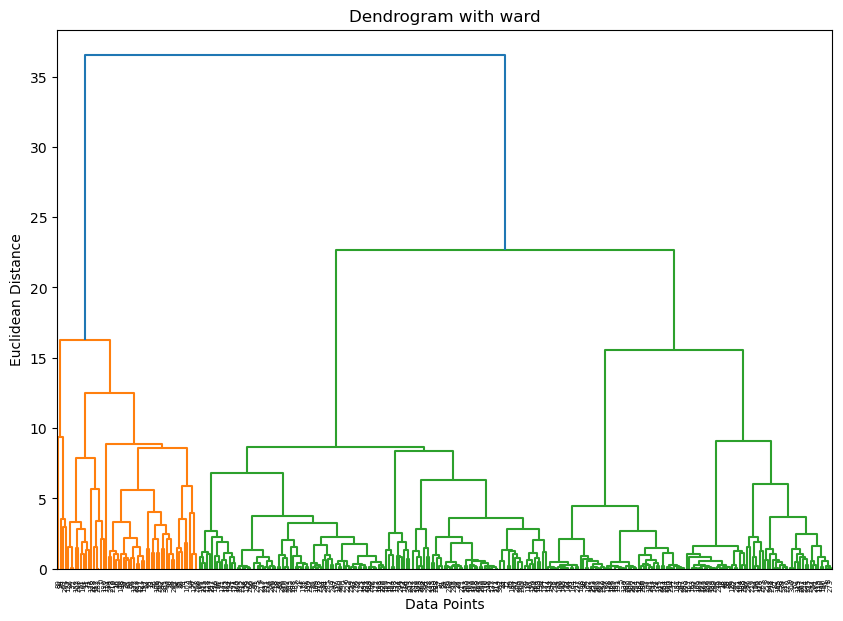

In [91]:
# Average Distance
linked = linkage(df_scaled, method='ward')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + 'ward')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [92]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,1,Anjasmoro,573,400,5,5,1,20055000000,0,3,1,1
1,3,Araya,330,750,8,8,4,6350000000,0,0,1,1
2,1,Araya,254,265,4,3,2,5300000000,1,0,1,0
3,1,Asemrowo,225,140,4,4,1,2500000000,1,0,2,0
4,1,Babatan,128,170,4,4,2,2800000000,0,0,2,0


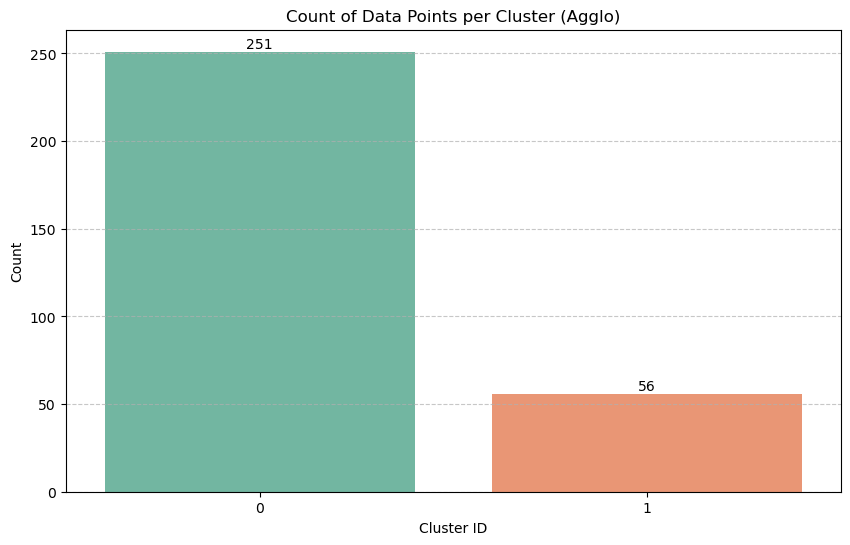

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

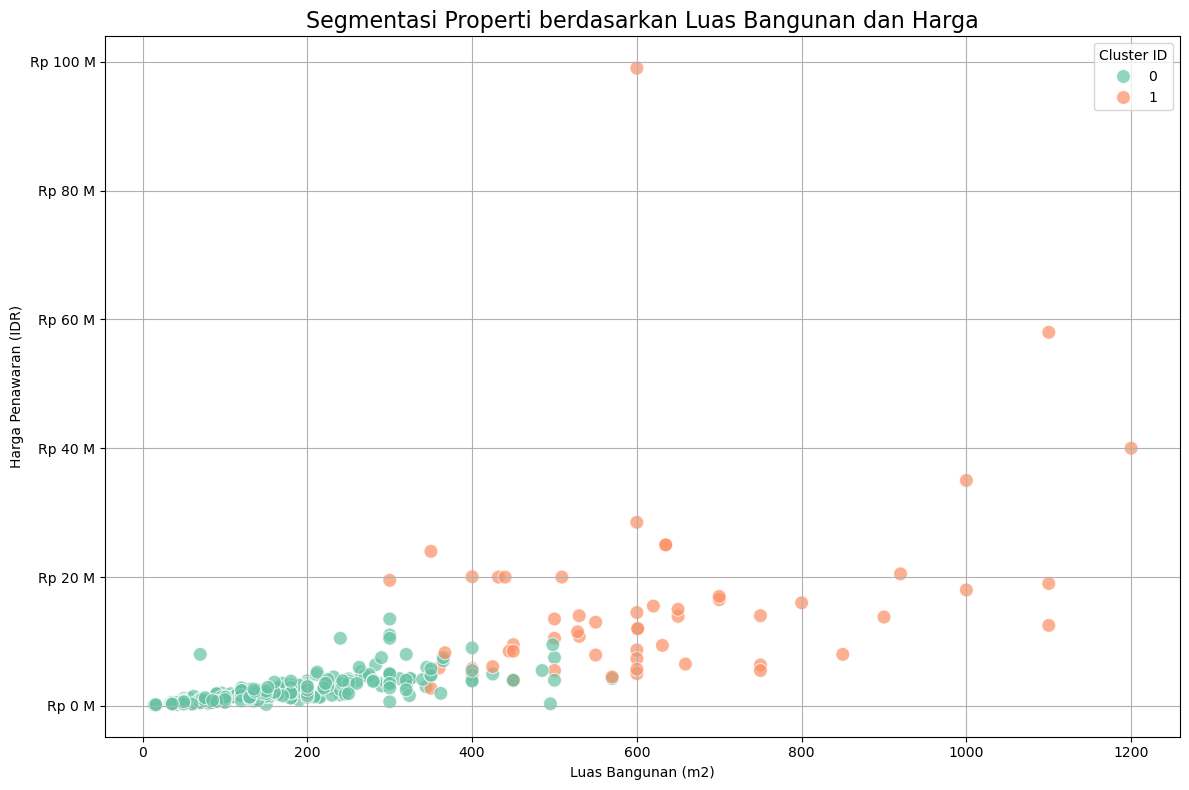

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # Ini untuk format angka besar (harga)

plt.figure(figsize=(12, 8)) 
sns.scatterplot(
    data=df, 
    x='Luas Bangunan',  
    y='Harga Penawaran', 
    hue='Agglo',  
    palette='Set2', 
    s=100, 
    alpha=0.7
)

plt.title('Segmentasi Properti berdasarkan Luas Bangunan dan Harga', fontsize=16)
plt.xlabel('Luas Bangunan (m2)')
plt.ylabel('Harga Penawaran (IDR)')
plt.legend(title='Cluster ID')
plt.grid(True)

def format_miliar(x, pos):
    'Fungsi untuk format angka ke Miliar (M)'
    return 'Rp {:,.0f} M'.format(x * 1e-9)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_miliar))
plt.tight_layout() 
plt.show()

In [97]:
import plotly.express as px

x_col = 'Luas Bangunan'
y_col = 'Harga Penawaran'
z_col = 'Luas Tanah' 

fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str),
                    title='Segmentasi Properti 3D (Luas Bangunan, Harga, dan Luas Tanah)')

fig.update_layout(
    scene=dict(
        xaxis_title='Luas Bangunan',
        yaxis_title='Harga Penawaran (IDR)',
        zaxis_title='Luas Tanah'
    )
)
fig.show()

## Statistical Summary for each cluster

In [96]:
agg_dict = {
    'Nama Daerah': ['count', 'first'], 
    'Posisi Rumah': ['first'],
    'Arah Hadap Rumah': ['first'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std'],
    'Luas Tanah': ['mean', 'std'],
    'Jumlah Kamar': ['mean'],
    'Jumlah Kamar Mandi': ['mean'],
    'Tingkat/Lantai': ['mean']
}

cluster_summary = df.groupby('Agglo').agg(agg_dict)
cluster_summary = cluster_summary.rename(columns={'first': 'Mode (Umum)'}, level=1)
cluster_summary = cluster_summary.rename_axis('Cluster ID')
cluster_summary

Nama Daerah             Posisi Rumah Arah Hadap Rumah  \
                 count Mode (Umum)  Mode (Umum)      Mode (Umum)   
Cluster ID                                                         
0                  251       Araya            0                1   
1                   56   Anjasmoro            3                0   

           Harga Penawaran                                         \
                      mean           std         min          max   
Cluster ID                                                          
0             2.628250e+09  2.050970e+09   160000000  13500000000   
1             1.575027e+10  1.493437e+10  2750000000  99000000000   

           Luas Bangunan              Luas Tanah             Jumlah Kamar  \
                    mean         std        mean         std         mean   
Cluster ID                                                                  
0             187.776892  107.036321  155.848606   93.452239     3.852590   
1             621.214286  212.411240  546.875000  245.541632     6.178571   

           Jumlah Kamar Mandi Tingkat/Lantai  
                         mean           mean  
Cluster ID                                    
0                    2.912351       1.808765  
1                    5.250000       1.982143

1.  **Cluster 0: "Umum" (251)**
    * **Profil:** Ini adalah segmen pasar terbesar (251 properti) yang didominasi oleh area "Araya". Segmen ini terdiri dari rumah keluarga standar dengan rata-rata 3-4 kamar tidur, 2-3 kamar mandi, dan luas bangunan sekitar 187 m².
    * **Nilai:** Harga rata-rata properti di segmen ini adalah **2.62 Miliar IDR**. Ini adalah segmen bervolume tinggi (high-volume).

2.  **Cluster 1: "Luxury" (56)**
    * **Profil:** Ini adalah segmen *niche* yang jauh lebih kecil (56 properti) yang berpusat di area "Anjasmoro". Properti di sini secara signifikan lebih besar, dengan rata-rata 6 kamar tidur, 5 kamar mandi, dan luas bangunan masif 621 m².
    * **Nilai:** Harga rata-rata adalah **15.75 Miliar IDR**, enam kali lebih mahal dari segmen pasar menengah. Ini adalah segmen bernilai tinggi (high-value).

### Implikasi Bisnis dan Strategi

* **Strategi Harga**
    * **Cluster 0 (Umum):** Karena ini adalah pasar bervolume tinggi, strategi harga harus kompetitif dan berbasis pasar. Harga harus ditetapkan berdasarkan perbandingan langsung dengan properti serupa di area "Araya". Penentuan harga dapat difokuskan pada "best value" per meter persegi.
    * **Cluster 1 (Luxury):** Strategi harga harus berbasis prestise dan nilai (prestige/value-based). Harga tidak hanya ditentukan oleh ukuran, tetapi oleh eksklusivitas lokasi. Perusahaan dapat menetapkan harga premium karena pembeli di segmen ini kurang sensitif terhadap harga dan lebih mementingkan status, kemewahan, dan ukuran.

* **Target Pemasaran**
    * **Cluster 0 (Umum):** Pemasaran harus bersifat **massal dan fokus pada keluarga**. Pesan utama harus menyoroti fungsionalitas, lokasi yang strategis, dan keterjangkauan untuk rumah keluarga yang ideal.
    * **Cluster 1 (Luxury):** Pemasaran harus **sangat tersegmentasi, eksklusif, dan ditargetkan** pada individu dengan kekayaan bersih tinggi (High-Net-Worth Individuals). Pesan harus berfokus pada kemewahan, ruang yang luas, dan status yang terkait dengan memiliki properti besar di lokasi tertentu.

* **Pengembangan Produk/Inventaris**
    * Perusahaan dapat melihat bahwa **Cluster 0** mewakili permintaan yang stabil dan volume penjualan yang konsisten. 
    * **Cluster 1** mewakili peluang margin keuntungan yang tinggi per unit. Pengembang dapat memfokuskan akuisisi lahan di masa depan di area premium untuk proyek-proyek *niche* yang mewah, meskipun volume penjualannya lebih rendah.